# Code for varying final time and amount of data points for neural ODE

In this code, we experiment with changing the simulation end points, as well as the amount of data points in the data set, to see where limits are of the neural ODE approach to inferring the GRN from data

In [1]:
import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
import matplotlib.pyplot as plt
import numpy as np

# Juptyer magic: For export. Makes the plots size right for the screen 
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_formats = ['svg'] 


torch.backends.cudnn.deterministic = True
seed = np.random.randint(1,200)
seed = 56
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
print(seed)
g = torch.Generator()
g.manual_seed(seed)

56


check


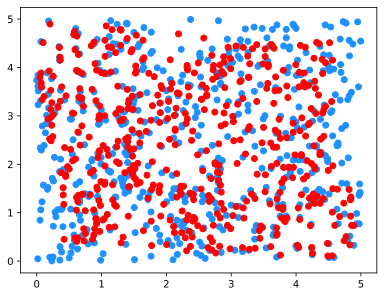

No change applied to TS or repr data


In [2]:
data_noise = 0.0
plotlim = [-0.2, 1.2]
subfolder = 'traj_TS'


from models.training import create_dataloader
dataloader, dataloader_viz = create_dataloader('TS', noise = data_noise, plotlim = plotlim, random_state = seed, label = 'vector', deltat=0.1, batch_size=500)

In [3]:
#Import of the model dynamics that describe the neural ODE
#The dynamics are based on the torchdiffeq package, that implements ODE solvers in the pytorch setting
from models.neural_odes import NeuralODE

#for neural ODE based networks the network width is constant. In this example the input is 2 dimensional
hidden_dim, data_dim = 2, 2 
augment_dim = 0

#T is the end time of the neural ODE evolution, num_steps are the amount of discretization steps for the ODE solver
T, num_steps = 10, 1
bound = 0.
fp = False #this recent change made things not work anymore
cross_entropy = False
turnpike = False

non_linearity = 'tanh' #'relu' #
architecture = 'bottleneck' #outside

In [6]:
num_epochs = 100 #number of optimization runs in which the dataset is used for gradient decent
eps = 0.2

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=augment_dim, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3)

from models.training import doublebackTrainer

trainer_anode = doublebackTrainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps_comp = 0.2) 
# verbose = True for more details
l,lv = trainer_anode.train(dataloader, num_epochs)

1
('flow.dynamics.fc1_time.0.weight', Parameter containing:
tensor([[ 0.6408,  0.0858],
        [-0.2071,  0.6300]], requires_grad=True))
('flow.dynamics.fc1_time.0.bias', Parameter containing:
tensor([-0.0458,  0.3226], requires_grad=True))
('flow.dynamics.fc3_time.0.weight', Parameter containing:
tensor([[-0.3169, -0.0376],
        [ 0.3370,  0.0398]], requires_grad=True))
('flow.dynamics.fc3_time.0.bias', Parameter containing:
tensor([-0.3936,  0.3883], requires_grad=True))
('linear_layer.weight', Parameter containing:
tensor([[-0.0714, -0.3217],
        [-0.1351,  0.1778]], requires_grad=True))
('linear_layer.bias', Parameter containing:
tensor([0.1261, 0.0204], requires_grad=True))

Iteration 0/7
Loss: nan
Epoch 1: nan

Iteration 0/7
Loss: nan
Epoch 2: nan

Iteration 0/7
Loss: nan
Epoch 3: nan

Iteration 0/7
Loss: nan
Epoch 4: nan

Iteration 0/7
Loss: nan
Epoch 5: nan

Iteration 0/7
Loss: nan
Epoch 6: nan

Iteration 0/7
Loss: nan
Epoch 7: nan

Iteration 0/7
Loss: nan
Epoch 8: nan


nan
('flow.dynamics.fc1_time.0.weight', Parameter containing:
tensor([[nan, nan],
        [nan, nan]], requires_grad=True))
('flow.dynamics.fc1_time.0.bias', Parameter containing:
tensor([nan, nan], requires_grad=True))
('flow.dynamics.fc3_time.0.weight', Parameter containing:
tensor([[nan, nan],
        [nan, nan]], requires_grad=True))
('flow.dynamics.fc3_time.0.bias', Parameter containing:
tensor([nan, nan], requires_grad=True))
('linear_layer.weight', Parameter containing:
tensor([[nan, nan],
        [nan, nan]], requires_grad=True))
('linear_layer.bias', Parameter containing:
tensor([nan, nan], requires_grad=True))


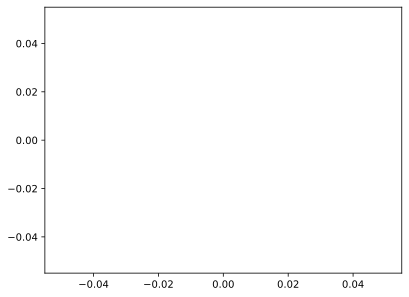

In [5]:
print(l)
for param in anode.named_parameters():
    print(param)

plt.plot(range(0,len(lv)),lv)